
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

### Interactive Workflow of Principal Component Analysis as a Rotation

#### Michael Pyrcz, Associate Professor, University of Texas at Austin,
    
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy),

#### Principal Component Analysis (PCA)

This was a basic demonstration of PCA as a orthogonal transformation (a rotation as we preserve the inner product space, the pairwise distances and angles between all points).

* by rotating the orthogonal components in 2D we can maximize the variance explained by a single component while reducing the absolute correlation between the components to 0.0. 

Appreciation to Professor Martin H. Trauth for the suggestion to also include the correlation and to comment on the decorrelation of components at the same time as maximizing the variance explained by the first component.

First, some more on Principal Component Analysis one of a variety of methods for dimensional reduction:

Dimensional reduction transforms the data to a lower dimension

* Given features, $𝑋_1,\dots,𝑋_𝑚$  we would require ${m \choose 2}=\frac{𝑚 \cdot (𝑚−1)}{2}$ scatter plots to visualize just the two-dimensional scatter plots.

* Once we have 4 or more variables understanding our data gets very hard.

* Recall the curse of dimensionality, impact inference, modeling and visualization. 

One solution, is to find a good lower dimensional, $𝑝$,  representation of the original dimensions $𝑚$

Benefits of Working in a Reduced Dimensional Representation:

1. Data storage / Computational Time

2. Easier visualization

3. Also takes care of multicollinearity 

#### Orthogonal Transformation 

Convert a set of observations into a set of linearly uncorrelated variables known as principal components

* The number of principal components ($k$) available are min⁡($𝑛−1,𝑚$) 

* Limited by the variables/features, $𝑚$, and the number of data

Components are ordered

* First component describes the larges possible variance / accounts for as much variability as possible
* Next component describes the largest possible remaining variance 
* Up to the maximum number of principal components

Eigen Values / Eigen Vectors

* The Eigen values are the variance explained for each component. 
* The Eigen vectors of the data covariance matrix are the principal components and the Eigen  
* Out of scope – just making the linkage

#### Getting Started
Here are the steps to get setup in Python with the GeostatsPy package:
1.	Install Anaconda 3 on your machine (https://www.anaconda.com/download/).
2.	From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal.
3.	In the terminal type: pip install geostatspy.
4.	Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality.

You will need to copy the data file to your working directory. They are available here:
   - Tabular data - unconv_MV_v2.csv at https://git.io/fjmBH.

#### Install Packages

For this interactive workflow to work, we need to install several packages relating to display features, widgets and data analysis interpretation.

In [32]:
import os                                                 # to set current working directory 
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
from matplotlib.ticker import AutoMinorLocator            # gridlines
from matplotlib.gridspec import GridSpec
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive, interact              # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
import matplotlib.transforms as transforms
import math
from ipywidgets import VBox, HBox
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
cmap = plt.cm.inferno
plt.rc('axes', axisbelow=True)

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

In [47]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
    
def add_grid2(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Mutlivariate Dataset

Let’s load multivariate dataset, from subsurface energy with 1,000 unconventional wells including:

* porosity
* log transform of permeability (to linearize the relationships with other variables)
* accoustic impedance (kg/m^3 x m/s x 10^6)
* brittness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).
* scaled production
 
all samples have the support volume of a well (one measure per well).
 
Note, this dataset is available on my GitHub in my [GeoDataSets](https://github.com/GeostatsGuy/GeoDataSets) repository.

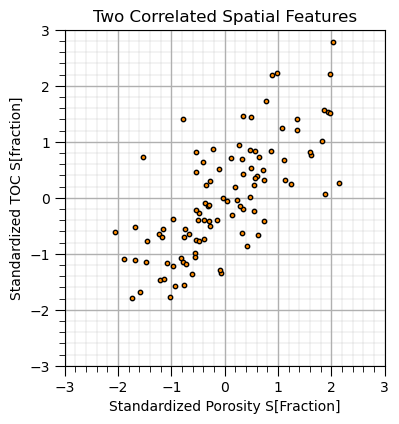

In [34]:
df=pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v2.csv")[["Por","TOC"]].iloc[0:100]

x = StandardScaler().fit(df).transform(df)
plt.scatter(x[:,0],x[:,1],color='darkorange',edgecolor='black',s=10); plt.xlim([-3,3]); plt.ylim([-3,3])
add_grid(); plt.xlabel('Standardized Porosity S[Fraction]'); plt.ylabel('Standardized TOC S[fraction]'); plt.title('Two Correlated Spatial Features')

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.7, wspace=0.1, hspace=0.1); plt.show()

### Interactive Feature Projection with Arbitrary Rotation

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Observed the partitioning of variance and corretion over 2 new features through orthogonal projection / rotation.

##### The Inputs

* **Angle**: data rotation angle

In [323]:
def dashboard(Angle):
    
    fig = plt.figure(constrained_layout=False)
    gs = GridSpec(2, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[:, 0])
      
    base = plt.gca().transData
    #print(base)
    rot = transforms.Affine2D().rotate_deg(int(Angle))
    #line=ax16.plot(x[:,0],x[:,1], 'o', transform= rot + base, c = 'black', alpha = 0.3)
    line=ax1.plot(norm[:,0],norm[:,1], 'o', c = 'black', alpha = 0.3)
    
    xdata=x[:,0]*math.cos(math.radians(int(Angle)))-x[:,1]*math.sin(math.radians(int(Angle)))
    ydata=x[:,1]*math.cos(math.radians(int(Angle)))+x[:,0]*math.sin(math.radians(int(Angle)))
    
    eigen = np.zeros([2,2])
    eigen[0,0] = math.cos(Angle*math.pi/180.0)
    eigen[1,0] = math.sin(Angle*math.pi/180.0)
    eigen[0,1] = -1*math.sin(Angle*math.pi/180.0)
    eigen[1,1] = math.cos(Angle*math.pi/180.0)
    
    df2 = pd.DataFrame({'x':xdata, 'y':ydata})
    data = df2.values
    lists=[]
    
    ydataZeroed = np.zeros(len(ydata))

    rotinv = transforms.Affine2D().rotate_deg(int(-Angle)) 
    ax1.plot(xdata, ydataZeroed,"or", c = 'red', alpha = 0.3,transform= rotinv + base,label=r'$C_1$')
    ax1.plot(ydataZeroed, ydata,"or", c= 'blue', alpha = 0.3,transform= rotinv + base,label=r'$C_2$')
    ax1.set_xlim(left=-3.5, right=3.5); ax1.set_ylim(bottom=-3.5, top=3.5)
    ax1.set_title("Data and Arbitrary Feature Projection Components"); ax1.set_xlabel(r'Standardized Porosity, $X_1$'); ax1.set_ylabel(r'Standardized TOC, $X_2$')
    ax1.annotate(r'$C_1=X_1 \cdot COS \left(\alpha \cdot \frac{180}{\pi} \right)-X_2 \cdot SIN \left(\alpha \cdot \frac{180}{\pi} \right)$',(-3.0,-2.5)) 
    ax1.annotate(r'$C_2=X_1 \cdot SIN \left(\alpha \cdot \frac{180}{\pi} \right)+X_2 \cdot COS \left(\alpha \cdot \frac{180}{\pi} \right)$',(-3.0,-2.8)) 
    
    add_grid2(ax1); ax1.legend(loc='lower right')
    sizes = []
    
#     print('Your Estimated Principal Component/Eigen Vector #1 = ' + str(eigen[:,0]))
#     print('Your Estimated Principal Component/Eigen Vector #2 = ' + str(eigen[:,1]))
    
    sumOfVariance=df2.var()['x']+df2.var()['y']
    sizes.append(df2.var()['x']/sumOfVariance)
    sizes.append(df2.var()['y']/sumOfVariance)
    
    ax2 = fig.add_subplot(gs[0, 1])
    
    n = ax2.pie(sizes, autopct='%1.1f%%',colors = ['lightcoral','royalblue'],shadow=True,startangle=90)
    n[0][0].set_alpha(1.0); n[0][1].set_alpha(1.0)
    ax2.axis('equal')
    labels = [r'$\frac{\sigma_{C_1}^2}{\sigma_{X_1+X_2}^2}$', r'$\frac{\sigma_{C_2}^2}{\sigma_{X_1+X_2}^2}$']
    ax2.legend(sizes, labels=labels,loc='upper left')
    ax2.set_title('Components\' Proportion of Variance')
#    plt.tight_layout()


    ax3 = fig.add_subplot(gs[1, 1])
    nAngle = 30
    var_pc1 = np.zeros(nAngle); var_pc2 = np.zeros(nAngle); corr = np.zeros(nAngle)
    
    for iAngle, lAngle in enumerate(np.linspace(0,180,nAngle)): 
        xdata=x[:,0]*math.cos(math.radians(int(lAngle)))-x[:,1]*math.sin(math.radians(int(lAngle)))
        ydata=x[:,1]*math.cos(math.radians(int(lAngle)))+x[:,0]*math.sin(math.radians(int(lAngle)))
        var_pc1[iAngle] = np.var(xdata); var_pc2[iAngle] = np.var(ydata) 
        corr[iAngle] = np.corrcoef(xdata,ydata)[0,1]

    ax3.plot(np.linspace(0,180,nAngle),var_pc1/np.full((nAngle),2.0)-0.006,color='red',lw=2)
    ax3.plot(np.linspace(0,180,nAngle),var_pc1/np.full((nAngle),2.0)+0.006,color='teal',lw=2)
    #ax3.plot(np.linspace(0,180,nAngle),var_pc2/np.full((nAngle),2.0),color='blue',lw=2,label = r'Prop $\sigma_{x_2}^2$')
    ax3.fill_between(np.linspace(0,180,nAngle),var_pc1/np.full((nAngle),2.0),np.full((nAngle),0.0),color='red',alpha=0.4,label = r'$\frac{\sigma_{C_1}^2}{\sigma_{X_1+X_2}^2}$',zorder=2)
    ax3.fill_between(np.linspace(0,180,nAngle),np.full((nAngle),1.0),var_pc1/np.full((nAngle),2.0),color='blue',alpha=0.4,label = r'$\frac{\sigma_{C_2}^2}{\sigma_{X_1+X_2}^2}$',zorder=2)
    ax3.plot([Angle,Angle],[0,1.0],color='black',lw=3,ls='--',zorder=500)
    
    ax4 = ax3.twinx()
    ax4.plot(np.linspace(0,180,nAngle),corr,color='black',lw=4,label = r'$\rho_{C_1,C_2}$',zorder=101)
    ax4.plot(np.linspace(0,180,nAngle),corr,color='white',lw=6,zorder=100)
    ax4.plot([0,180],[0,0],color='black',lw=2,zorder=101)
    ax4.plot([0,180],[0,0],color='white',lw=4,zorder=100)
    add_grid2(ax3); plt.xlim([0,180]); ax3.set_ylabel('Proportion of Variance ($C_1$|$C_2$)')
    ax3.set_ylim([0,1]); ax4.set_ylim([-1,1]); ax3.legend(loc='lower left'); ax4.legend(loc='lower right')
    ax4.set_ylabel('Correlation'); ax3.set_title('Components\' Variance Proportions and Correlation for all Angles')
    ax3.set_xlabel(r'Rotation Angle ($\alpha$)')
    newYlabel = ['0.0|1.0','0.2|0.8','0.4|0.6','0.6|0.4','0.8|0.2','1.0|0.0']
    ax3.set_yticklabels(newYlabel)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.1, wspace=0.2, hspace=0.1); plt.show()
    
title = widgets.Text(value='                           Understanding PCA with an Interactive Orthogonal Feature Projection, Professor Michael J. Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
style = {'description_width': 'initial'}
widget_angle = widgets.IntSlider(min=0, max = 180, value = 0, step = 5, description = r'Rotation Angle ($\alpha$)',orientation='horizontal',continuous_update=False,layout=Layout(width='950px', height='30px'),style=style)
uik2 = widgets.VBox([title,widget_angle],)
interactive_plot = widgets.interactive_output(dashboard, {'Angle': widget_angle})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Feature Projection with Arbitrary Rotation Angle to Explore Principal Component Analysis

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Observed the partitioning of variance over 2 new features through orthogonal projection / rotation.

The Inputs: **Angle**: data rotation angle

In [324]:
display(uik2,interactive_plot)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 4 Axes>', 'i…

#### Comments

This was a basic demonstration of PCA as a orthogonal transformation (a rotation as we preserve the inner product space, the pairwise distances and angles between all points).

* by rotating the orthogonal components in 2D we can maximize the variance explained by a single component while reducing the absolute correlation between the components to 0.0.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling, multivariate analysis, inferntial and predictive machine learning, deep learning and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)